# CPU Cache and its impact on computations

François-David Collin (CNRS, IMAG, Paul-Valéry Montpellier 3
University)  
Ghislain Durif (CNRS, LBMC)  
Monday, August 26, 2024

## Toy example: list sum

### Setup environment

In [1]:
# requirements
import random
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook+plotly_mimetype+svg"

### Construct a list of integers

In [2]:
# a list of integers from 1 to 10000 with random order
items = list(range(10000))
random.shuffle(items)

### Sum of the list elements

In [3]:
# vanilla Python
t1 = %timeit -r 5 -n 50 -q -o sum(items)

In [4]:
# Numpy version
array = np.array(items)
t2 = %timeit -r 5 -n 50 -q -o array.sum()

### Which one is faster ?

In [5]:
# vanilla Python time
t1

In [6]:
# Numpy version time
t2

## WHY ?

-   **List** elements **not contiguous** in memory: loading elements
    from memory to CPU cache individually
-   **Numpy array** elements **contiguous** in memory: loading elements
    from memory to CPU cache by batch

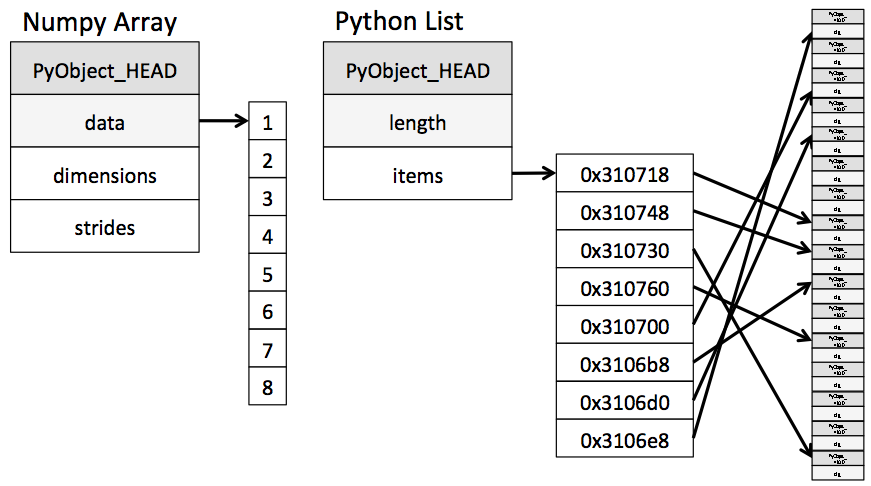 Credit: [Jake
VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/02.01-understanding-data-types.html)

## Benchmark list sum vs numpy array sum

In [7]:
def benchmark1(N):
    print(f"sum of {N} elements")
    items = list(range(N))
    random.shuffle(items)
    # vanilla Python
    t1 = %timeit -r 5 -n 20 -q -o sum(items)
    # Numpy version
    array = np.array(items)
    t2 = %timeit -r 5 -n 20 -q -o array.sum()
    # output
    return t1.average, t2.average

### Checking increasing list size

In [8]:
list_size = np.trunc(10**np.arange(2, 7, 0.2)).astype(int)

In [9]:
# check the list size candidates
fig = px.scatter(y=list_size, log_y=True, width=600)
fig.show()

### Run the benchmark

In [10]:
# run the benchmark
res = []

for N in list_size:
    
    time_res = benchmark1(N)
    
    res.append({
        'N': N,
        'vanilla': time_res[0],
        'numpy': time_res[1]
    })

### Results

In [11]:
df_res = pd.DataFrame(res)
px.line(df_res, x='N', y=['vanilla', 'numpy'], log_y=True, log_x=True, width=600)

## Benchmark cache effect on numpy array sum

In [12]:
def benchmark2(N):
    print(f"sum of {N} elements")
    items = list(range(N))
    random.shuffle(items)
    # Numpy version
    array = np.array(items)
    t1 = %timeit -r 5 -n 10 -q -o array.sum()
    # output
    return t1.average

### Checking increasing list size

### Run the benchmark

In [13]:
# run the benchmark
res = []

for N in list_size:
    
    time_res = benchmark2(N)
    
    res.append({
        'N': N,
        'numpy': time_res
    })

### Results

In [14]:
df_res2 = pd.DataFrame(res)
px.line(df_res2, x='N', y='numpy', log_y=True, log_x=True, width=600)